# Viral Tweets: K-Nearest Neighbor Classifier 

Twitter data provided in JSON files by Codecademy https://www.codecademy.com/paths/data-science/tracks/supervised-machine-learning-cumulative-project-skill-path/modules/supervised-learning-cumulative-project-skill-path/informationals/twitter-classification-cumulative-project-skill-path

In this project, a KNN classifier will be built with the goal of classifying a tweet as being either viral or non-viral based on various features of a tweet and a predetermined virality label. Whether a tweet is considered viral or not is determined by the number of retweets a particular tweet gets.

In [1]:
# ingesting and inspecting the data
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user']['location'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa


# Defining Viral Tweets



In [2]:
# inspecting median and mean number of retweets each particular tweet got in the dataset
import numpy as np

median_retweets = all_tweets['retweet_count'].median()
print(median_retweets)

mean_retweets = all_tweets['retweet_count'].mean()
print(mean_retweets)

13.0
2777.95639246779


In [3]:
# Defining what is considered a viral tweet (this will be altered later)
# A tweet being viral is a very relative term, so for now the threshold will start at 50 retweets
viral_tweet = 50 #retweets

# Observing how many tweets were viral
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= viral_tweet, 1, 0)
print(all_tweets['is_viral'].value_counts())

0    6490
1    4609
Name: is_viral, dtype: int64


# Making Features

Now that a label has been created for every tweet in the dataset, we can begin thinking about which features might determine whether a tweet is viral.

In [4]:
# Creating new columns in the dataset to represent these features.

all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: (tweet['user']['followers_count']), axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

In [5]:
all_tweets['hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)
all_tweets['hashtags'].value_counts()

0     9495
1     1091
2      291
3      109
4       51
5       27
6       17
7       10
9        4
8        3
10       1
Name: hashtags, dtype: int64

# Normalizing The Data

The data will now be scaled appropriately for machine learning, and the desired features will be isolated from the rest of the dataset.

In [6]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]
scaled_data = scale(data, axis=0)

print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305]


# Creating the Training Set and Test Set

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

# Using the Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.5887387387387387


# Choosing K

The classifier was tested with `k = 5`, but this did not produce a very good score for R^2. Different values of k will be tested to see if the score can be improved.

In [9]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
plt.plot(range(1, 200), scores)
plt.xlabel('K')
plt.ylabel('Classifier Score')
plt.show()

<Figure size 640x480 with 1 Axes>

# Replication

Using values of k ranging from 1 to 200 did not improve the classifier's accuracy by a significant margin. Therefore, I will write a function that replicates this classifier with different virality thresholds and tweet features as parameters to see how the classifier can be improved.

In [10]:
def viral_tweets_classifier(viral, features):
    
    # establishing features and what is considered a viral tweet
    all_tweets['viral'] = np.where(all_tweets['retweet_count'] >= viral, 1, 0)
    labels = all_tweets['viral']
    data = all_tweets[features]
    scaled_data = scale(data, axis=0)
    
    # train test split
    train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)
    
    # Plotting score of KNN classifier with different values of k
    scores = []
    for k in range(1, 200):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(train_data, train_labels)
        scores.append(classifier.score(test_data, test_labels))
    k = range(1, 200)
    plt.plot(k, scores)
    plt.xlabel('K')
    plt.ylabel('Classifier Score')
    plt.show()
    
    # returning the best score and accompanying value of k
    best_score = max(scores)
    best_k = k[scores.index(best_score)]
    return "The best classifier score is " + str(best_score) + " where k = " + str(best_k)


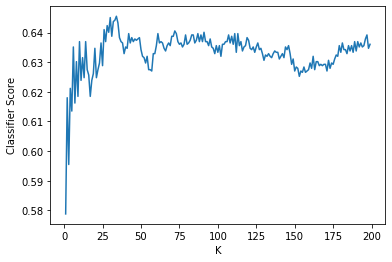

'The best classifier score is 0.6454954954954955 where k = 34'

In [11]:
viral_tweets_classifier(100, ['tweet_length','followers_count','friends_count'])

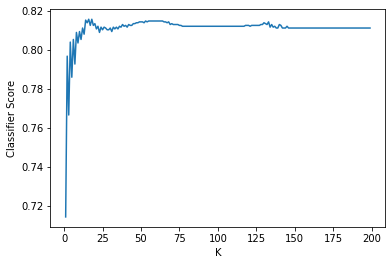

'The best classifier score is 0.8157657657657658 where k = 16'

In [12]:
viral_tweets_classifier(1000, ['tweet_length','followers_count','friends_count', 'hashtags'])

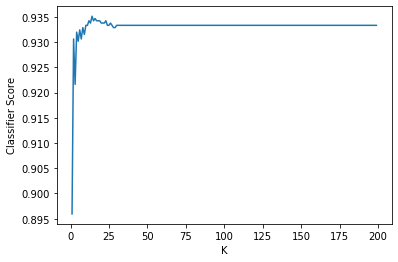

'The best classifier score is 0.9351351351351351 where k = 14'

In [13]:
viral_tweets_classifier(10000, ['tweet_length','followers_count','friends_count', 'hashtags'])

As expected, the classifier becomes more accurate as the virality threshold increases, since a tweet's virality can be described by how many retweets it gets. However, it is important to note that if the virality threshold imput into the function becomes too high, the classifier will become less and less useful. Notice how the function call directly above had an R^2 score of 0.9351. Although this particular model is quite accurate, it assumes that people do not conisder tweets that receive less than 10,000 retweets to be viral, which is likely untrue in many instances. Thus, a lower virality threshold would be beneficial. 